In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
vg = pd.read_csv('VIDEOGAMES/vgsales.csv', index_col=0)
vg

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [21]:
pokemon = vg[['Pokemon' in s for s in vg['Name']]]
nintendo = vg[vg['Publisher'] == 'Nintendo']

In [22]:
top_100 = vg[:100]

In [23]:
vg.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [24]:
percentuale_pokemon = len(pokemon)/len(nintendo)
percentuale_non_pokemon = 1 - percentuale_pokemon
(percentuale_pokemon,percentuale_non_pokemon)

(0.049786628733997154, 0.9502133712660028)

In [25]:
import plotly.graph_objects as go

labels = ['Pokémon', 'Altri giochi Nintendo']
values = [percentuale_pokemon*100,percentuale_non_pokemon*100]
pulls = [0.1,0]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=pulls,marker_colors=['lightblue','rgba(32, 199, 49,.7)'],textinfo='none')])
fig.update_traces(textposition='inside')
fig.update_layout(
    paper_bgcolor = "#e3e7f0",
    uniformtext_minsize=12, 
    uniformtext_mode='hide'
)
fig.show()

In [26]:
publisher = vg[:100]['Publisher'].unique()
def mean_vendite(df, publishers) :
    res = []
    for publisher in publishers :
        media_vendite = df[df['Publisher'] == publisher]['Global_Sales'].mean()*(10**3)
        res.append((publisher, media_vendite))
    return res
medie = mean_vendite(vg,publisher)
medie

[('Nintendo', 2541.337126600285),
 ('Microsoft Game Studios', 1300.4761904761906),
 ('Take-Two Interactive', 967.4092009685229),
 ('Sony Computer Entertainment', 889.458272327965),
 ('Activision', 746.1128205128206),
 ('Ubisoft', 515.4397394136809),
 ('Bethesda Softworks', 1156.9014084507044),
 ('Electronic Arts', 821.8504811250926),
 ('Sega', 427.2143974960876),
 ('SquareSoft', 1108.6538461538462),
 ('Atari', 433.1129476584022)]

In [27]:
serie_medie_vendite = pd.Series(
    [x[1] for x in medie],
    [x[0] for x in medie]
)
serie_medie_vendite

Nintendo                       2541.337127
Microsoft Game Studios         1300.476190
Take-Two Interactive            967.409201
Sony Computer Entertainment     889.458272
Activision                      746.112821
Ubisoft                         515.439739
Bethesda Softworks             1156.901408
Electronic Arts                 821.850481
Sega                            427.214397
SquareSoft                     1108.653846
Atari                           433.112948
dtype: float64

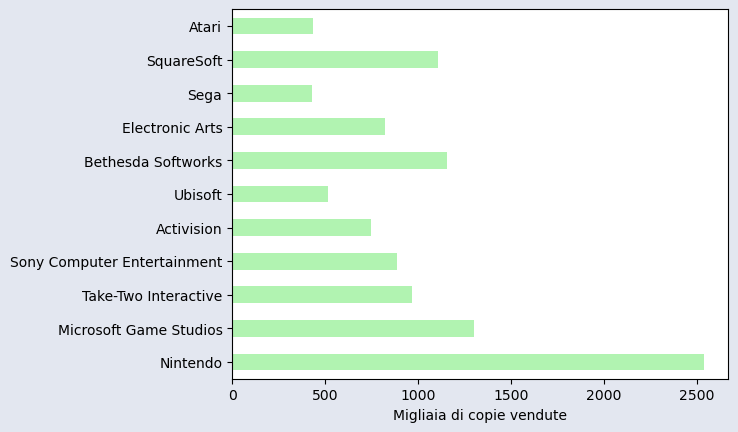

In [28]:
serie_medie_vendite.plot.barh(
    color='lightgreen',
    alpha=.7
)
plt.gcf().set_facecolor('#e3e7f0')
plt.xlabel('Migliaia di copie vendute')
plt.show()

In [29]:
pokemon_top_100 = top_100[['Pokemon' in s for s in top_100['Name']]]
pokemon_top_100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49


In [30]:
#prendo tutti i giochi della nintendo che non sono pokemon in top 100
nintendo_top_100 = top_100[top_100['Publisher'] == 'Nintendo']
nintendo_top_100.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [31]:
#tutti gli altri "giochi/publisher" in top 100
altri_top_100 = top_100[top_100['Publisher'] != 'Nintendo']
altri_top_100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24


In [32]:
def diversi_publ(df, nomi):
    res = []
    for nome in nomi:
        res.append((nome,len(df[df['Publisher'] == nome])))
    return res
els = []
for x in diversi_publ(altri_top_100, altri_top_100['Publisher'].unique()) : 
    els.append(x)
els.append(('Pokémon', len(pokemon_top_100)))
els.append(('Nintendo', len(nintendo_top_100)))
els 

[('Microsoft Game Studios', 6),
 ('Take-Two Interactive', 9),
 ('Sony Computer Entertainment', 8),
 ('Activision', 14),
 ('Ubisoft', 2),
 ('Bethesda Softworks', 1),
 ('Electronic Arts', 5),
 ('Sega', 1),
 ('SquareSoft', 1),
 ('Atari', 1),
 ('Pokémon', 10),
 ('Nintendo', 52)]

In [33]:
labels = [x[0] for x in els]
values = [x[1] for x in els]
colors = [
    'rgba(255, 99, 132, .7)',  # Rosso
    'rgba(117, 112, 111, .7)',  # Blu
    'rgba(255, 206, 86, .7)',  # Giallo
    'rgba(75, 192, 192, .7)',  # Verde acqua
    'rgba(153, 102, 255, .8)', # Viola
    'rgba(255, 159, 64, .7)',  # Arancione
    'rgba(255, 99, 71, .7)',   # Rosso pomodoro
    'rgba(60, 179, 113, .7)',  # Verde medio
    'rgba(129, 181, 9, .7)',  # Viola medio
    'rgba(161, 5, 116, .7)',   # Azzurro profondo
    'rgba(255, 140, 0, .7)',   # Arancione scuro
    'rgba(144, 238, 144, .7)'  # Verde chiaro
]
pulls = [0,0,0,0,0,0,0,0,0,0,0.1,0]
fig = go.Figure(data=[go.Pie(labels=labels, values=values,marker_colors=colors,pull=pulls)])
fig.update_traces(textposition='inside')
fig.update_layout(
    paper_bgcolor = "#e3e7f0",
    uniformtext_minsize=12, 
    uniformtext_mode='hide'
)
fig.show()

In [34]:
#differenza vendite nei vari posti del mondo tra top pokemon e top gioco
migliore_mondo = vg[:1]
migliore_pokemon = pokemon[:1]

In [35]:
primo = pd.DataFrame(
    [migliore_mondo['NA_Sales'], migliore_mondo['JP_Sales'], migliore_mondo['EU_Sales'], migliore_mondo['Global_Sales'], migliore_mondo['Other_Sales']],
)

primo_pokemon = pd.DataFrame(
    [migliore_pokemon['NA_Sales'], migliore_pokemon['JP_Sales'], migliore_pokemon['EU_Sales'], migliore_pokemon['Global_Sales'], migliore_pokemon['Other_Sales']],
)

comparazione = pd.DataFrame(
    {
        'Top videogame' : [x[0] for x in primo.values],
        'Pokémon' :[x[0] for x in primo_pokemon.values]
    },
    primo.index
)
comparazione

,Top videogame,Pokémon
NA_Sales,41.49,11.27
JP_Sales,3.77,10.22
EU_Sales,29.02,8.89
Global_Sales,82.74,31.37
Other_Sales,8.46,1.00


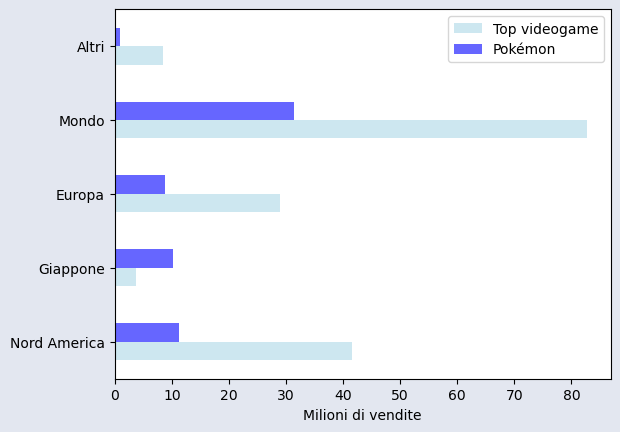

In [36]:
comparazione.plot.barh(
    color=['lightblue', 'blue'],
    alpha=.6
)
plt.gcf().set_facecolor('#e3e7f0')
plt.yticks([0,1,2,3,4],['Nord America', 'Giappone', 'Europa', 'Mondo', 'Altri'])
plt.xlabel('Milioni di vendite')
plt.show()